## Simple Gradient Descent

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]    # In Celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]    # No units
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

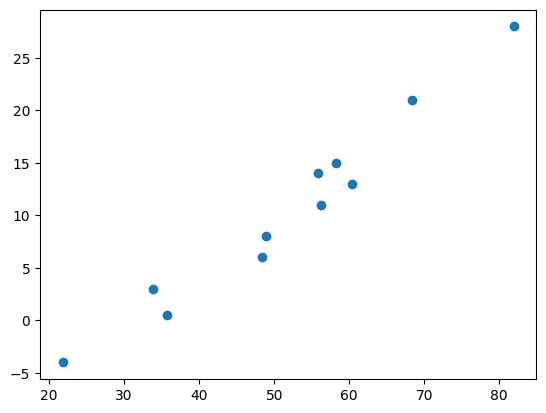

In [8]:
plt.scatter(t_u, t_c)

In [14]:
def model(input_t, weights, bias):
    return weights * input_t + bias

def loss_fn(output_t, input_t):
    squared_diffs = (output_t - input_t) ** 2
    return squared_diffs.mean()

In [17]:
w = torch.ones(())
b = torch.zeros(())
t_new = model(t_u, w, b)
t_new

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [18]:
loss = loss_fn(t_new, t_c)
loss

tensor(1763.8848)

In [21]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c) /
                         (2.0 * delta))
loss_rate_of_change_w

tensor(-4462.7925)

In [22]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

In [23]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) -
                         loss_fn(model(t_u, w, b - delta), t_c) /
                         (2.0 * delta))
b = b - learning_rate * loss_rate_of_change_b

In [32]:
def dloss_fn(out_t, act_t):
    return 2 * (out_t - act_t) / out_t.size(0)

def dmodel_dw(in_t):
    return in_t

def dmodel_db():
    return 1.0

In [28]:
def grad_fn(in_t, act_t, out_t):
    dloss_dtp = dloss_fn(out_t, act_t)
    dloss_dw = dloss_dtp * dmodel_dw(in_t)
    dloss_db = dloss_dtp * dmodel_db()
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [47]:
def training_loop(n_epochs, lr, params, in_t, act_t):
    final_loss = 0.0
    for epoch in range(n_epochs):
        weights, bias = params

        out_t = model(in_t, weights, bias)
        loss_val = loss_fn(out_t, act_t)
        grad = grad_fn(in_t, act_t, out_t)

        params = params - lr * grad

        if (epoch + 1) % 200 == 0:
            print(f'    Epoch {epoch + 1}, Loss {float(loss_val)}')
        final_loss = loss_val

    print(f'Params: {params}')
    print(f'Final Loss: {final_loss}')
    return params

In [38]:
training_loop(100, 1e-2, params=torch.tensor([1.0, 0.0]), in_t=t_u, act_t=t_c)

    Epoch 1, Loss 1763.884765625
    Epoch 2, Loss 5802484.5
    Epoch 3, Loss 19408029696.0
    Epoch 4, Loss 64915905708032.0
    Epoch 5, Loss 2.1713052546105344e+17
    Epoch 6, Loss 7.262575831529281e+20
    Epoch 7, Loss 2.429183416467663e+24
    Epoch 8, Loss 8.125122549611731e+27
    Epoch 9, Loss 2.717688212084259e+31
    Epoch 10, Loss 9.090110518901907e+34
    Epoch 11, Loss inf
    Epoch 12, Loss inf
    Epoch 13, Loss inf
    Epoch 14, Loss inf
    Epoch 15, Loss inf
    Epoch 16, Loss inf
    Epoch 17, Loss inf
    Epoch 18, Loss inf
    Epoch 19, Loss inf
    Epoch 20, Loss inf
    Epoch 21, Loss inf
    Epoch 22, Loss inf
    Epoch 23, Loss nan
    Epoch 24, Loss nan
    Epoch 25, Loss nan
    Epoch 26, Loss nan
    Epoch 27, Loss nan
    Epoch 28, Loss nan
    Epoch 29, Loss nan
    Epoch 30, Loss nan
    Epoch 31, Loss nan
    Epoch 32, Loss nan
    Epoch 33, Loss nan
    Epoch 34, Loss nan
    Epoch 35, Loss nan
    Epoch 36, Loss nan
    Epoch 37, Loss nan
    Epoch

tensor([nan, nan])

In [39]:
training_loop(100, 1e-3, params=torch.tensor([1.0, 0.0]), in_t=t_u, act_t=t_c)

    Epoch 1, Loss 1763.884765625
    Epoch 2, Loss 41399.59765625
    Epoch 3, Loss 986624.625
    Epoch 4, Loss 23528170.0
    Epoch 5, Loss 561094464.0
    Epoch 6, Loss 13380874240.0
    Epoch 7, Loss 319104483328.0
    Epoch 8, Loss 7609941753856.0
    Epoch 9, Loss 181480420540416.0
    Epoch 10, Loss 4327910500466688.0
    Epoch 11, Loss 1.0321116508926771e+17
    Epoch 12, Loss 2.461360407747494e+18
    Epoch 13, Loss 5.869806156751936e+19
    Epoch 14, Loss 1.3998199544408776e+21
    Epoch 15, Loss 3.338263274850858e+22
    Epoch 16, Loss 7.961026752245693e+23
    Epoch 17, Loss 1.8985296766941502e+25
    Epoch 18, Loss 4.527576982018665e+26
    Epoch 19, Loss 1.0797280117197434e+28
    Epoch 20, Loss 2.5749145261349537e+29
    Epoch 21, Loss 6.140605718892351e+30
    Epoch 22, Loss 1.4644000858063465e+32
    Epoch 23, Loss 3.492271559755413e+33
    Epoch 24, Loss 8.328302025766313e+34
    Epoch 25, Loss 1.986117406288558e+36
    Epoch 26, Loss inf
    Epoch 27, Loss inf
    Ep

tensor([nan, nan])

In [40]:
training_loop(100, 1e-4, params=torch.tensor([1.0, 0.0]), in_t=t_u, act_t=t_c)

    Epoch 1, Loss 1763.884765625
    Epoch 2, Loss 323.09051513671875
    Epoch 3, Loss 78.92963409423828
    Epoch 4, Loss 37.5528450012207
    Epoch 5, Loss 30.540283203125
    Epoch 6, Loss 29.351154327392578
    Epoch 7, Loss 29.148883819580078
    Epoch 8, Loss 29.113847732543945
    Epoch 9, Loss 29.107145309448242
    Epoch 10, Loss 29.105247497558594
    Epoch 11, Loss 29.104167938232422
    Epoch 12, Loss 29.103221893310547
    Epoch 13, Loss 29.102294921875
    Epoch 14, Loss 29.10137939453125
    Epoch 15, Loss 29.100465774536133
    Epoch 16, Loss 29.09954833984375
    Epoch 17, Loss 29.098630905151367
    Epoch 18, Loss 29.09771728515625
    Epoch 19, Loss 29.0967960357666
    Epoch 20, Loss 29.09588050842285
    Epoch 21, Loss 29.094959259033203
    Epoch 22, Loss 29.09404945373535
    Epoch 23, Loss 29.0931339263916
    Epoch 24, Loss 29.09221649169922
    Epoch 25, Loss 29.09130096435547
    Epoch 26, Loss 29.09038543701172
    Epoch 27, Loss 29.08946418762207
    Epoch

tensor([ 0.2327, -0.0438])

In [41]:
t_un = 0.1 * t_u

In [50]:
fin_params = training_loop(5000, 1e-2, params=torch.tensor([1.0, 0.0]), in_t=t_un, act_t=t_c)

    Epoch 200, Loss 16.60806655883789
    Epoch 400, Loss 9.857804298400879
    Epoch 600, Loss 6.438284397125244
    Epoch 800, Loss 4.706046104431152
    Epoch 1000, Loss 3.828537940979004
    Epoch 1200, Loss 3.3840177059173584
    Epoch 1400, Loss 3.158830404281616
    Epoch 1600, Loss 3.0447587966918945
    Epoch 1800, Loss 2.986973524093628
    Epoch 2000, Loss 2.957697868347168
    Epoch 2200, Loss 2.9428696632385254
    Epoch 2400, Loss 2.935356378555298
    Epoch 2600, Loss 2.931553840637207
    Epoch 2800, Loss 2.929626226425171
    Epoch 3000, Loss 2.9286484718322754
    Epoch 3200, Loss 2.9281539916992188
    Epoch 3400, Loss 2.927903890609741
    Epoch 3600, Loss 2.9277760982513428
    Epoch 3800, Loss 2.927712917327881
    Epoch 4000, Loss 2.927680253982544
    Epoch 4200, Loss 2.927663564682007
    Epoch 4400, Loss 2.9276540279388428
    Epoch 4600, Loss 2.9276504516601562
    Epoch 4800, Loss 2.9276480674743652
    Epoch 5000, Loss 2.927647590637207
Params: tensor([  5.

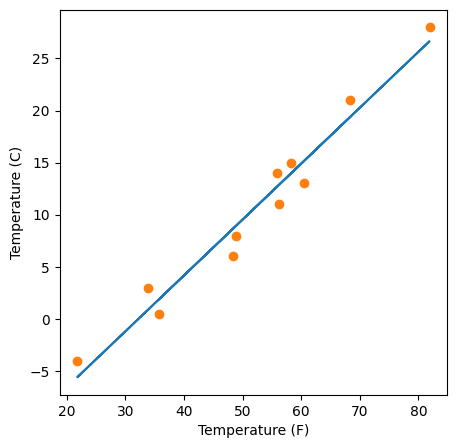

In [53]:
final_t = model(t_un, *fin_params)
fig = plt.figure(figsize=(5, 5))
plt.xlabel('Temperature (F)')
plt.ylabel('Temperature (C)')
plt.plot(t_u.numpy(), final_t.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## Autograd

In [1]:
import torch

In [37]:
# Same as before
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]    # In Celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]    # No units
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model(x, weights, bias):
    return weights * x + bias

def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

In [24]:
# requires_grad=True automatically keeps track of tensors resulting from operations on params
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
parameters.grad is None

True

In [25]:
loss = loss_fn(model(t_u, *parameters), t_c)
loss.backward()

In [26]:
parameters.grad

tensor([4517.2969,   82.6000])

In [27]:
# Gradients accumulate over time, so we have to zero them
if parameters.grad is not None:
    parameters.grad.zero_()

In [38]:
# New training loop with autograd
def training_loop(n_epochs, lr, params, t_in, t_act):
    for epoch in range(n_epochs):
        if params.grad is not None:
            params.grad.zero_()

        out = model(t_in, *params)
        loss_val = loss_fn(out, t_act)
        loss_val.backward()

        with torch.no_grad():
            params -= lr * params.grad

        if (epoch + 1) % 200 == 0:
            print(f'Epoch: {epoch + 1}, Loss: {float(loss_val)}')

    return params

In [40]:
t_un = 0.1 * t_u
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
updated_params = training_loop(5000, 1e-2, parameters, t_un, t_c)

Epoch: 200, Loss: 16.60806655883789
Epoch: 400, Loss: 9.857802391052246
Epoch: 600, Loss: 6.438284397125244
Epoch: 800, Loss: 4.706046104431152
Epoch: 1000, Loss: 3.828537940979004
Epoch: 1200, Loss: 3.3840177059173584
Epoch: 1400, Loss: 3.158830404281616
Epoch: 1600, Loss: 3.0447587966918945
Epoch: 1800, Loss: 2.986973524093628
Epoch: 2000, Loss: 2.957697868347168
Epoch: 2200, Loss: 2.9428696632385254
Epoch: 2400, Loss: 2.935356378555298
Epoch: 2600, Loss: 2.931553840637207
Epoch: 2800, Loss: 2.929626226425171
Epoch: 3000, Loss: 2.9286484718322754
Epoch: 3200, Loss: 2.9281539916992188
Epoch: 3400, Loss: 2.927903890609741
Epoch: 3600, Loss: 2.9277760982513428
Epoch: 3800, Loss: 2.927712917327881
Epoch: 4000, Loss: 2.9276793003082275
Epoch: 4200, Loss: 2.9276628494262695
Epoch: 4400, Loss: 2.9276556968688965
Epoch: 4600, Loss: 2.9276490211486816
Epoch: 4800, Loss: 2.927647590637207
Epoch: 5000, Loss: 2.9276468753814697


## Optimizers

In [42]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

In [43]:
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([parameters], lr=learning_rate)

In [46]:
model_out = model(t_u, *parameters)
loss = loss_fn(model_out, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
parameters

tensor([ 0.8298, -0.0031], requires_grad=True)

In [49]:
# New training loop with optimizer
def training_loop(n_epochs, optim_, params, t_in, t_act):
    for epoch in range(n_epochs):
        out = model(t_in, *params)
        loss_val = loss_fn(out, t_act)

        optim_.zero_grad()
        loss_val.backward()
        optim_.step()

        if (epoch + 1) % 200 == 0:
            print(f'Epoch: {epoch + 1}, Loss: {float(loss_val)}')

    return params

In [51]:
t_un = 0.1 * t_u
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([parameters], lr=learning_rate)

training_loop(5000, optimizer, parameters, t_un, t_c)

Epoch: 200, Loss: 16.608068466186523
Epoch: 400, Loss: 9.857809066772461
Epoch: 600, Loss: 6.438288688659668
Epoch: 800, Loss: 4.706045150756836
Epoch: 1000, Loss: 3.828537940979004
Epoch: 1200, Loss: 3.3840177059173584
Epoch: 1400, Loss: 3.158830404281616
Epoch: 1600, Loss: 3.0447587966918945
Epoch: 1800, Loss: 2.986973524093628
Epoch: 2000, Loss: 2.957697868347168
Epoch: 2200, Loss: 2.9428696632385254
Epoch: 2400, Loss: 2.935356378555298
Epoch: 2600, Loss: 2.931553840637207
Epoch: 2800, Loss: 2.929626226425171
Epoch: 3000, Loss: 2.9286484718322754
Epoch: 3200, Loss: 2.9281539916992188
Epoch: 3400, Loss: 2.927903890609741
Epoch: 3600, Loss: 2.9277760982513428
Epoch: 3800, Loss: 2.927712917327881
Epoch: 4000, Loss: 2.9276793003082275
Epoch: 4200, Loss: 2.9276628494262695
Epoch: 4400, Loss: 2.9276556968688965
Epoch: 4600, Loss: 2.9276490211486816
Epoch: 4800, Loss: 2.927647590637207
Epoch: 5000, Loss: 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [52]:
# New optimizer: Adam
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([parameters], lr=learning_rate)

training_loop(5000, optimizer, parameters, t_u, t_c)

Epoch: 200, Loss: 19.082256317138672
Epoch: 400, Loss: 10.508146286010742
Epoch: 600, Loss: 5.6413798332214355
Epoch: 800, Loss: 3.6775739192962646
Epoch: 1000, Loss: 3.086698293685913
Epoch: 1200, Loss: 2.9531850814819336
Epoch: 1400, Loss: 2.9306914806365967
Epoch: 1600, Loss: 2.927908182144165
Epoch: 1800, Loss: 2.9276609420776367
Epoch: 2000, Loss: 2.9276463985443115
Epoch: 2200, Loss: 2.9276444911956787
Epoch: 2400, Loss: 2.927645206451416
Epoch: 2600, Loss: 2.9276463985443115
Epoch: 2800, Loss: 2.927644968032837
Epoch: 3000, Loss: 2.9276459217071533
Epoch: 3200, Loss: 2.9276444911956787
Epoch: 3400, Loss: 2.927647352218628
Epoch: 3600, Loss: 2.927644968032837
Epoch: 3800, Loss: 2.927644968032837
Epoch: 4000, Loss: 2.927645683288574
Epoch: 4200, Loss: 2.927645206451416
Epoch: 4400, Loss: 2.927645683288574
Epoch: 4600, Loss: 2.9276463985443115
Epoch: 4800, Loss: 2.927645206451416
Epoch: 5000, Loss: 2.927645206451416


tensor([  0.5368, -17.3048], requires_grad=True)

## Train/Validation Split

In [54]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[n_val:]

In [57]:
train_t_u = t_u[train_indices]
val_t_u = t_u[val_indices]

train_t_c = t_c[train_indices]
val_t_c = t_c[val_indices]

train_t_un = train_t_u * 0.1
val_t_un = val_t_u * 0.1

In [55]:
def training_loop(n_epochs, optim_, params, train_tun, train_tc, val_tun, val_tc):
    for epoch in range(n_epochs):
        train_out = model(train_tun, *params)
        train_loss = loss_fn(train_out, train_tc)

        with torch.no_grad():
            val_out = model(val_tun, *params)
            val_loss = loss_fn(val_out, val_tc)
            assert val_loss.requires_grad == False

        optim_.zero_grad()
        train_loss.backward()
        optim_.step()

        if epoch <= 3 or (epoch + 1) % 200 == 0:
            print(f'Epoch: {epoch + 1}, Train Loss: {float(train_loss)}, Val Loss: {val_loss.float()}')

    return params

In [59]:
parameters = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([parameters], learning_rate)

training_loop(5000, optimizer, parameters, train_t_un, train_t_c, val_t_un, val_t_c)

Epoch: 1, Train Loss: 54.602176666259766, Val Loss: 91.76600646972656
Epoch: 2, Train Loss: 28.94879913330078, Val Loss: 53.02854919433594
Epoch: 3, Train Loss: 24.009109497070312, Val Loss: 42.797889709472656
Epoch: 4, Train Loss: 23.025007247924805, Val Loss: 39.56832504272461
Epoch: 200, Train Loss: 15.000133514404297, Val Loss: 24.509685516357422
Epoch: 400, Train Loss: 10.155324935913086, Val Loss: 16.305133819580078
Epoch: 600, Train Loss: 7.2239508628845215, Val Loss: 11.313128471374512
Epoch: 800, Train Loss: 5.450300216674805, Val Loss: 8.271053314208984
Epoch: 1000, Train Loss: 4.377147674560547, Val Loss: 6.41361141204834
Epoch: 1200, Train Loss: 3.7278332710266113, Val Loss: 5.276676177978516
Epoch: 1400, Train Loss: 3.33495831489563, Val Loss: 4.578587055206299
Epoch: 1600, Train Loss: 3.0972490310668945, Val Loss: 4.148285865783691
Epoch: 1800, Train Loss: 2.9534213542938232, Val Loss: 3.8817737102508545
Epoch: 2000, Train Loss: 2.866398811340332, Val Loss: 3.715726613998

tensor([  5.3152, -17.4214], requires_grad=True)

In [ ]:
def calc_forward(t_in, t_act, params, is_train):
    with torch.set_grad_enabled(is_train):
        t_out = model(t_in, *params)
        loss_ = loss_fn(t_out, t_act)
    return loss_

## Exercises

### Exercise 1

In [61]:
def model_new(t_in, weights1, weights2, bias):
    return weights2 * t_in ** 2 + weights1 * t_in + bias

In [65]:
def forward(inputs, targets, params, is_train):
    with torch.set_grad_enabled(is_train):
        outs = model_new(inputs, *params)
        loss_ = loss_fn(outs, targets)
    return loss_

In [63]:
def training_loop(n_epochs, params, optim_, train_data, train_targets, val_data, val_targets):
    for epoch in range(n_epochs):
        train_loss = forward(train_data, train_targets, params, True)
        val_loss = forward(val_data, val_targets, params, False)

        optim_.zero_grad()
        train_loss.backward()
        optim_.step()

        if epoch <= 3 or (epoch + 1) % 200 == 0:
            print(f'Epoch {epoch + 1}    Train Loss: {train_loss.float()}    Val Loss: {val_loss.float()}')
    return params

In [67]:
parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([parameters], learning_rate)
training_loop(5000, parameters, optimizer, train_t_un, train_t_c, val_t_un, val_t_c)

Epoch 1    Train Loss: 562.052001953125    Val Loss: 681.0538330078125
Epoch 2    Train Loss: 380.4105224609375    Val Loss: 451.0948791503906
Epoch 3    Train Loss: 258.93408203125    Val Loss: 299.12115478515625
Epoch 4    Train Loss: 177.6937713623047    Val Loss: 198.969482421875
Epoch 200    Train Loss: 12.909128189086914    Val Loss: 15.54959487915039
Epoch 400    Train Loss: 12.175434112548828    Val Loss: 14.329854011535645
Epoch 600    Train Loss: 11.490619659423828    Val Loss: 13.218446731567383
Epoch 800    Train Loss: 10.851422309875488    Val Loss: 12.207230567932129
Epoch 1000    Train Loss: 10.254799842834473    Val Loss: 11.288636207580566
Epoch 1200    Train Loss: 9.697917938232422    Val Loss: 10.45562744140625
Epoch 1400    Train Loss: 9.178129196166992    Val Loss: 9.701674461364746
Epoch 1600    Train Loss: 8.692960739135742    Val Loss: 9.020700454711914
Epoch 1800    Train Loss: 8.240105628967285    Val Loss: 8.407062530517578
Epoch 2000    Train Loss: 7.8174123

tensor([-1.0164,  0.5915, -0.9676], requires_grad=True)

a) Only the parameters had to be updated to include one more entry for the new weight
b) The training loop in general stays the same, including the calculation of the loss, updating the parameters...
c) The resulting loss is higher than before
d) The output is worse in general